In [62]:
from tensorflow import keras
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
import pandas as pd

In [63]:
data = pd.read_csv('Airlines.csv')

# Creamos variable delay2 para mapear como variable categórica a Delay

data['delay2'] = data['Delay'].map({0: 'On Time', 1: 'Delayed'})
data

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,delay2
0,1,CO,269,SFO,IAH,3,15,205,1,Delayed
1,2,US,1558,PHX,CLT,3,15,222,1,Delayed
2,3,AA,2400,LAX,DFW,3,20,165,1,Delayed
3,4,AA,2466,SFO,DFW,3,20,195,1,Delayed
4,5,AS,108,ANC,SEA,3,30,202,0,On Time
...,...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0,On Time
539379,539380,FL,398,SEA,ATL,5,1439,305,0,On Time
539380,539381,FL,609,SFO,MKE,5,1439,255,0,On Time
539381,539382,UA,78,HNL,SFO,5,1439,313,1,Delayed


delay2
Delayed    240264
On Time    299119
Name: delay2, dtype: int64


<BarContainer object of 2 artists>

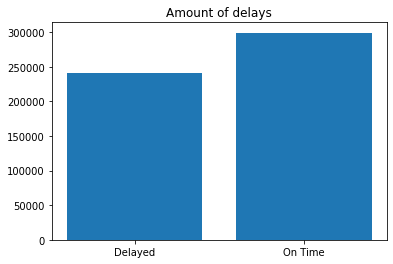

In [64]:
### Análisis Exploratorio

delays_grouped = data['delay2'].groupby(data['delay2']).count()
print(delays_grouped)

plt.title("Amount of delays")
plt.bar(delays_grouped.keys(), delays_grouped)


In [65]:
delays_dummy = pd.get_dummies(data, columns=['delay2'])
delays_dummy

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay,delay2_Delayed,delay2_On Time
0,1,CO,269,SFO,IAH,3,15,205,1,1,0
1,2,US,1558,PHX,CLT,3,15,222,1,1,0
2,3,AA,2400,LAX,DFW,3,20,165,1,1,0
3,4,AA,2466,SFO,DFW,3,20,195,1,1,0
4,5,AS,108,ANC,SEA,3,30,202,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0,0,1
539379,539380,FL,398,SEA,ATL,5,1439,305,0,0,1
539380,539381,FL,609,SFO,MKE,5,1439,255,0,0,1
539381,539382,UA,78,HNL,SFO,5,1439,313,1,1,0


Airline  delay2 
9E       Delayed     8226
         On Time    12460
AA       Delayed    17736
         On Time    27920
AS       Delayed     3892
         On Time     7579
B6       Delayed     8459
         On Time     9653
CO       Delayed    11957
         On Time     9161
DL       Delayed    27452
         On Time    33488
EV       Delayed    11255
         On Time    16728
F9       Delayed     2899
         On Time     3557
FL       Delayed     6275
         On Time    14552
HA       Delayed     1786
         On Time     3792
MQ       Delayed    12742
         On Time    23863
OH       Delayed     3502
         On Time     9128
OO       Delayed    22760
         On Time    27494
UA       Delayed     8946
         On Time    18673
US       Delayed    11591
         On Time    22909
WN       Delayed    65657
         On Time    28440
XE       Delayed    11795
         On Time    19331
YV       Delayed     3334
         On Time    10391
dtype: int64


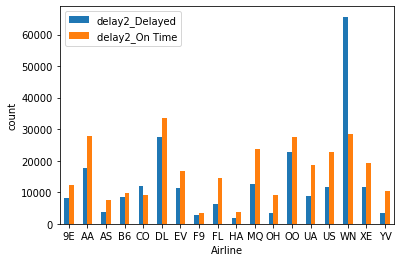

In [66]:
delays_per_airline = data.groupby(['Airline', 'delay2']).size()
print(delays_per_airline)

dummy_grouped_airlines = delays_dummy.groupby(delays_dummy["Airline"]).agg({'delay2_Delayed':'sum','delay2_On Time':'sum'})

ax = dummy_grouped_airlines.plot.bar(rot=0)
ax.set_ylabel("count");

In [67]:
delays_per_airport = data.groupby(['AirportFrom', 'delay2']).size()
delays_per_airport

dummy_grouped_airports = delays_dummy.groupby(delays_dummy["AirportFrom"]).agg({'delay2_Delayed':'sum','delay2_On Time':'sum'})
dummy_grouped_airports

,delay2_Delayed,delay2_On Time
AirportFrom,,
ABE,110.0,232.0
ABI,32.0,179.0
ABQ,1375.0,1424.0
ABR,1.0,1.0
ABY,22.0,65.0
...,...,...
VPS,210.0,423.0
WRG,18.0,41.0
XNA,317.0,811.0
